In [1]:
import pandas as pd
df = pd.read_excel("covid_reg_dataset.xlsx")

In [2]:
import seaborn as sns
sns.set(style='darkgrid')

In [3]:
import numpy as np
df['Log_Income'] = np.log(df['MdHHIncE'])

In [4]:
df = df.rename(columns={'below150poverty':'Poverty_Rate', 'COVIDCasesPer10k':'COVID19_Morbidity_Rate', 'TestsPer10k':'Testing_Rate'})

In [5]:
df.Borough.value_counts()

Brooklyn         18
Queens           14
Manhattan        10
Bronx            10
Staten Island     3
Name: Borough, dtype: int64

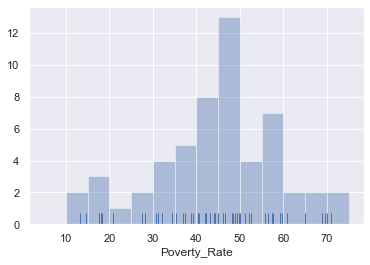

In [6]:
sns.distplot(df['Poverty_Rate'], kde=False, rug=True, hist_kws={"range":[5,75]}, bins=14)

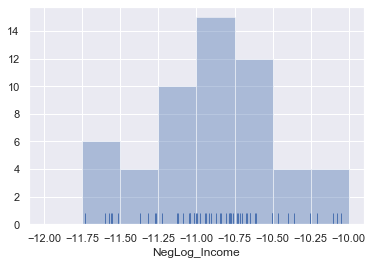

In [7]:
df['NegLog_Income'] = -1 * df['Log_Income']
sns.distplot(df.NegLog_Income, kde=False, rug=True, hist_kws={"range":[-12,-10]}, bins=8)

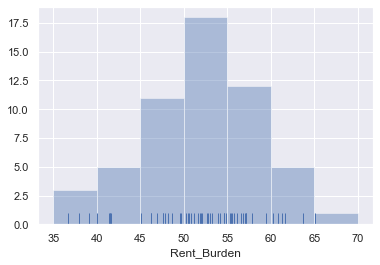

In [8]:
sns.distplot(df['Rent_Burden'], kde=False, rug = True, hist_kws={"range":[35,70]},bins=7)

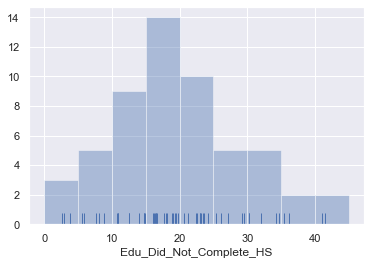

In [9]:
sns.distplot(df.Edu_Did_Not_Complete_HS, kde=False, rug=True, hist_kws={'range':[0,45]}, bins=9)

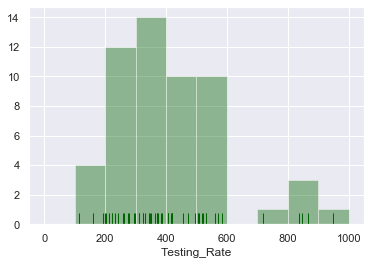

In [10]:
sns.distplot(df.Testing_Rate, kde=False, rug=True, hist_kws={"range":[0,1000]}, bins=10, color='darkgreen')

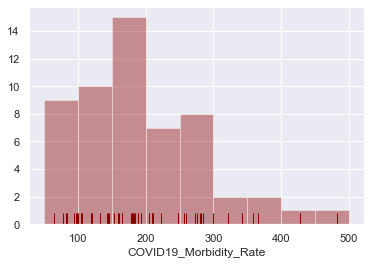

In [12]:
sns.distplot(df['COVID19_Morbidity_Rate'], kde=False, rug=True, hist_kws={"range":[50,500]}, bins=9, color='darkred')

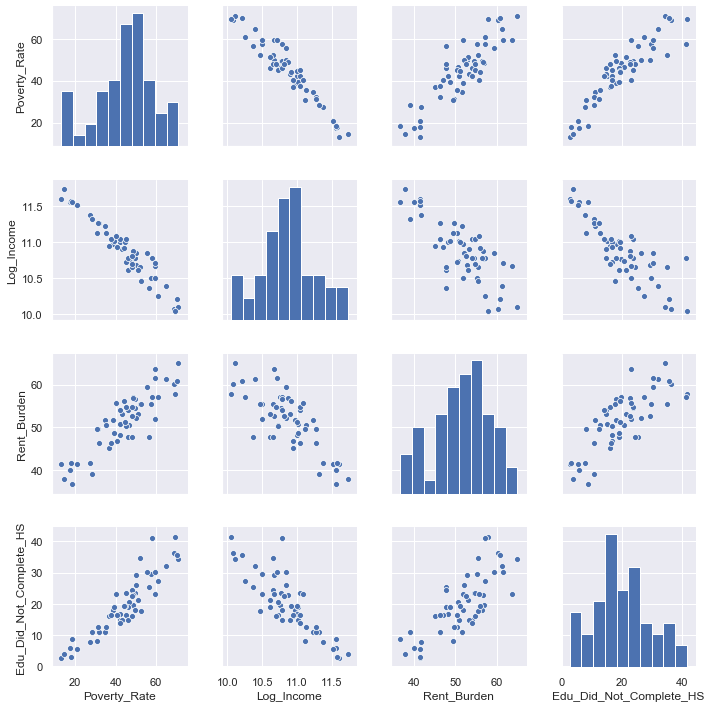

In [13]:
sns.pairplot(df[['Poverty_Rate','Log_Income','Rent_Burden','Edu_Did_Not_Complete_HS']])

In [14]:
import numpy as np
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [15]:
CronbachAlpha([df.NegLog_Income, df.Poverty_Rate, df.Rent_Burden, df.Edu_Did_Not_Complete_HS])

0.8153681959181629

In [16]:
df['SES_Index'] = df.NegLog_Income + df.Poverty_Rate + df.Rent_Burden + df.Edu_Did_Not_Complete_HS

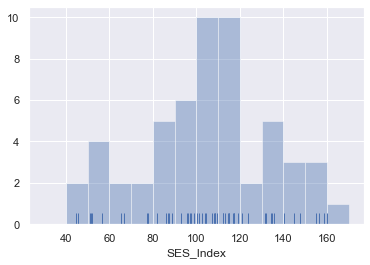

In [17]:
sns.distplot(df.SES_Index, kde = False, rug = True, hist_kws={'range':[30,170]}, bins=14)

In [12]:
df.COVID19_Morbidity_Rate.describe()

count     55.000000
mean     194.727920
std       91.706047
min       63.974802
25%      119.321916
50%      180.817298
75%      252.493389
max      482.302369
Name: COVID19_Morbidity_Rate, dtype: float64

In [16]:
df.columns

Index(['Unnamed: 0', 'puma10', 'Borough', 'COVID19_Morbidity_Rate',
       'Testing_Rate', 'Overall_Pop', 'pct_asian_nh', 'pct_black_nh',
       'pct_hispanic', 'pct_white_nh', 'pct_foreign_born', 'Ltd_Eng_Prof',
       'under18_rate', 'over65_rate', 'poverty_rate', 'Poverty_Rate',
       'Unemployment', 'Rent_Burden', 'MgBSciArtP', 'SrvcP', 'SalesOffP',
       'NRCnstMntP', 'PrdTrnsMMP', 'MdHHIncE', 'Median household income',
       'Edu_Did_Not_Complete_HS', 'Edu_HSGrad_Some_College',
       'Edu_College_Degree_And_Higher', 'HPV_Vaccination_All', 'Diabetes',
       'Obesity', 'Hypertension', 'count_hosp_clinic', 'Log_Income',
       'NegLog_Income', 'SES_Index'],
      dtype='object')

In [23]:
dfq = df[['SES_Index','COVID19_Morbidity_Rate', 'Testing_Rate','Poverty_Rate','Rent_Burden','MdHHIncE','Edu_Did_Not_Complete_HS']].copy()

In [24]:
dfq.sort_values(by=['SES_Index'], inplace = True)

In [25]:
dfq['group'] = 0

In [26]:
dfq.reset_index(drop=True, inplace=True)

In [27]:
dfq.loc[0:10,'group'] = 1
dfq.loc[11:21,'group'] = 2
dfq.loc[22:32,'group'] = 3
dfq.loc[33:43,'group'] = 4
dfq.loc[44:54,'group'] = 5

In [28]:
dfq.groupby('group').mean()

,SES_Index,COVID19_Morbidity_Rate,Testing_Rate,Poverty_Rate,Rent_Burden,MdHHIncE,Edu_Did_Not_Complete_HS
group,,,,,,,
1,60.978651,141.425197,353.384041,22.927273,42.272727,94780.181818,7.222727
2,93.433088,200.974964,449.479424,39.327273,49.713636,61412.454545,15.413636
3,107.085005,178.598734,355.312123,45.654545,52.331818,50840.363636,19.922727
4,118.636942,173.437835,344.993111,51.581818,53.945455,43264.727273,23.772727
5,145.519398,279.202870,534.426164,63.181818,59.968182,34810.000000,32.786364


In [28]:
round(df.COVID19_Morbidity_Rate.describe(),1)

count     55.0
mean     194.7
std       91.7
min       64.0
25%      119.3
50%      180.8
75%      252.5
max      482.3
Name: COVID19_Morbidity_Rate, dtype: float64

In [30]:
import numpy as np
df['Queens'] = np.where(df.Borough == 'Queens', 1, 0)
df['Brooklyn'] = np.where(df.Borough == 'Brooklyn', 1, 0)
df['Bronx'] = np.where(df.Borough == 'Bronx', 1, 0)
df['Staten_Island'] = np.where(df.Borough == 'Staten Island', 1, 0)

In [31]:
from statsmodels.formula.api import ols
model = ols('COVID19_Morbidity_Rate ~ SES_Index', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     COVID19_Morbidity_Rate   R-squared:                       0.191
Model:                                OLS   Adj. R-squared:                  0.176
Method:                     Least Squares   F-statistic:                     12.52
Date:                    Mon, 11 May 2020   Prob (F-statistic):           0.000848
Time:                            13:52:15   Log-Likelihood:                -320.23
No. Observations:                      55   AIC:                             644.5
Df Residuals:                          53   BIC:                             648.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.3094     42.063      1.220      0.228     -33.059     135.678
SES_Index      1.3642      0.386      3.538      0.001       0.591       2.138
==============================================================================
Omnibus:                        3.839   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                2.965
Skew:                           0.547   Prob(JB):                        0.227
Kurtosis:                       3.308   Cond. No.                         409.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model.pvalues

Intercept    0.227935
SES_Index    0.000848
dtype: float64

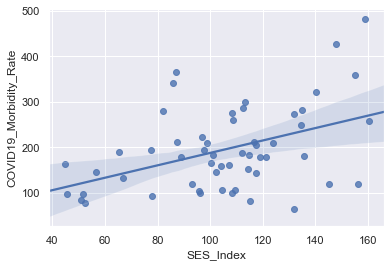

In [30]:
sns.regplot(x = 'SES_Index', y = 'COVID19_Morbidity_Rate', data=df)

In [32]:
model2 = ols('Testing_Rate ~ SES_Index', data=df).fit()

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Testing_Rate   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.319
Date:                Mon, 11 May 2020   Prob (F-statistic):             0.0741
Time:                        14:03:06   Log-Likelihood:                -361.64
No. Observations:                  55   AIC:                             727.3
Df Residuals:                      53   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    250.7088     89.312      2.807      0.007      71.572     429.845
SES_Index      1.4916      0.819      1.822      0.074      -0.151       3.134
==============================================================================
Omnibus:                       10.961   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.920
Skew:                           0.933   Prob(JB):                      0.00425
Kurtosis:                       4.133   Cond. No.                         409.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
ols('COVID19_Morbidity_Rate ~ SES_Index + Queens + Brooklyn + Bronx + Staten_Island', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     COVID19_Morbidity_Rate   R-squared:                       0.408
Model:                                OLS   Adj. R-squared:                  0.348
Method:                     Least Squares   F-statistic:                     6.759
Date:                    Thu, 07 May 2020   Prob (F-statistic):           7.31e-05
Time:                            19:12:08   Log-Likelihood:                -311.63
No. Observations:                      55   AIC:                             635.3
Df Residuals:                          49   BIC:                             647.3
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        56.6768     41.072      1.380      0.174     -25.860     139.214
SES_Index         0.9774      0.417      2.342      0.023       0.139       1.816
Queens           52.7510     32.145      1.641      0.107     -11.847     117.349
Brooklyn         -6.4573     31.332     -0.206      0.838     -69.422      56.507
Bronx            97.8330     39.542      2.474      0.017      18.371     177.295
Staten_Island   113.5484     48.759      2.329      0.024      15.563     211.534
==============================================================================
Omnibus:                        0.516   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.772   Jarque-Bera (JB):                0.184
Skew:                           0.134   Prob(JB):                        0.912
Kurtosis:                       3.094   Cond. No.                         656.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
ols('Testing_Rate ~ SES_Index + Queens + Brooklyn + Bronx + Staten_Island', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Testing_Rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     5.951
Date:                Mon, 11 May 2020   Prob (F-statistic):           0.000224
Time:                        14:10:56   Log-Likelihood:                -350.26
No. Observations:                  55   AIC:                             712.5
Df Residuals:                      49   BIC:                             724.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       274.1129     82.901      3.307      0.002     107.517     440.709
SES_Index         0.7187      0.842      0.853      0.398      -0.974       2.411
Queens           57.3293     64.883      0.884      0.381     -73.059     187.717
Brooklyn        -34.3998     63.243     -0.544      0.589    -161.491      92.691
Bronx           212.4488     79.813      2.662      0.010      52.058     372.839
Staten_Island   291.2482     98.418      2.959      0.005      93.470     489.026
==============================================================================
Omnibus:                        0.978   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.530
Skew:                           0.231   Prob(JB):                        0.767
Kurtosis:                       3.133   Cond. No.                         656.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
ols('COVID19_Morbidity_Rate ~ Testing_Rate', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     COVID19_Morbidity_Rate   R-squared:                       0.916
Model:                                OLS   Adj. R-squared:                  0.915
Method:                     Least Squares   F-statistic:                     579.3
Date:                    Mon, 11 May 2020   Prob (F-statistic):           3.34e-30
Time:                            17:11:42   Log-Likelihood:                -257.88
No. Observations:                      55   AIC:                             519.8
Df Residuals:                          53   BIC:                             523.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.4170      8.990     -0.380      0.705     -21.449      14.616
Testing_Rate     0.4862      0.020     24.069      0.000       0.446       0.527
==============================================================================
Omnibus:                        6.015   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.437
Skew:                          -0.518   Prob(JB):                       0.0660
Kurtosis:                       4.141   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""